<b>Grover Algorithm</b>

In this notebook we will introduce and explain Grover's Algorithm, that is used for unstructured search problems. As it is a quantum algorithm, it offers advantages that classical algorithms that cover the same problem cannot give, and that's why is widely used in that type of problems. This algorithm can give more speed in large database searches and, so, can speed up an unstructured search, specially when is very large.  
  
The main feature of Grover's Algorithm is the amplitude amplification trick, that consists on amplifying the amplitude of the element that we want to find. For that, we will pass to the algorithm a unstructured list, and the algorithm, with an oracle, will amplify the amplitude of the element that we want to find. That's why we will have to code the Oracle to do an specific task, on a specific element of the list.  
  
We will call this element we want to find the winner, w.  
  
<img src="https://qiskit.org/textbook/ch-algorithms/images/grover_list.png">  
  
To find the purple element, in classical computation we would have to check, on average, N/2 of these boxes (half of all), and in the worst case, all of them, and in the best case, we will find it at first position. On quantum computation, we can find it in $\sqrt{N}$ steps with Grover's amplitude amplification trick. Additionally, the algorithm doesn't use the list's internal structure, because it works with qubits, which makes it generic and reduces the complexity.

Now, we will talk about the oracle. We have to create a oracle that is able to change the phase of the element that we want to find. For example, we have 3 qubits (and that involves that our unstructed list is: [000,001,...,111]), and we want to find the element 101, so w = 101. Grover's algorithm will do:  
  
$U_\omega|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\
-|x\rangle \quad \text{if} \; x = \omega \\
\end{aligned}$  
  
And we can do that with custom gates that have associated an unitary matrix. The gate that can change the phase of 101 is:  
  
$U_\omega = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\\
\\
\\
\leftarrow \omega = \text{101}\\
\\
\\
\\
\end{aligned}$

Once we have the phase of the element we want to find, we will apply an additional reflection ($U_s = 2|s\rangle\langle s| - I$) that reflects the unique negative state (the state we want to find) with large amplitude than the rest of the elements. Finally, when we measure all the qubits, we will find that the most probable state is the state we want to find, the winner state.  
Here we have a representation of all the process:  
  
<img src="https://qiskit.org/textbook/ch-algorithms/images/grover_circuit_high_level.png">

Now we will take an example to develop the code in Python of the circuit.  
To make it simple, we will have only 2 qubits in the circuit, that gives us the list composed of 4 elements: [00,01,10,11], and we will suppose that we want to find the element 11, so w = 11.

First of all, we will create the oracle. One oracle that adds a negative phase to the element we want to find, 11, is the controlled-Z gate, with Unitary matrix:  
  
$U_\omega = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}$  
  
So, as a oracle Uf, we will have:  
  
<img src="https://qiskit.org/textbook/ch-algorithms/images/grover_circuit_2qbuits_oracle_11.svg">  
  
And the diffuser $U_s = 2|s\rangle\langle s| - I$ will be:  
  
<img src="https://qiskit.org/textbook/ch-algorithms/images/grover_circuit_2qbuits_reflection.svg">

So, with the Oracle and the Diffuser introduced, now we can develop the code.

In [1]:
from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np
from math import pi

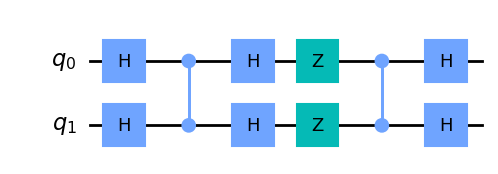

In [6]:
algorithm = QuantumCircuit(2)

algorithm.h([0,1])
algorithm.cz(0,1)
algorithm.h([0,1])
algorithm.z([0,1])
algorithm.cz(0,1)
algorithm.h([0,1])

algorithm.draw(output='mpl')

And then, we will see the result state vector to see if all states except the winner are with 0% of probability to see it.

In [9]:
algorithm_copy = algorithm.copy()
simulator = Aer.get_backend('aer_simulator')
algorithm_copy.save_statevector()
qobj = assemble(algorithm_copy)
statevec = simulator.run(qobj).result().get_statevector()
print(statevec)

Statevector([-7.49879891e-33+0.0000000e+00j,
              0.00000000e+00+1.2246468e-16j,
              7.49879891e-33+1.2246468e-16j,
              1.00000000e+00-2.4492936e-16j],
            dims=(2, 2))


As we can see, the only state with the real part with value 1 is the last one (the state |11>). This means that we have a 100% of chance to get the last state, the winner state we wanted to find.

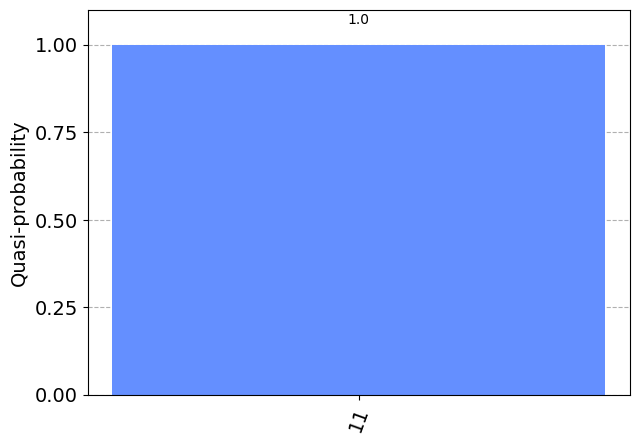

In [10]:
histogram = simulator.run(qobj).result().get_counts()
plot_histogram(histogram)

The circuit works correctly! We have an algorithm able to amplify the amplitude of any state we want with only few executions, and that's so powerful feature of the quantum computation.